In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

In [9]:
df = pd.read_csv('summary/summarized_data.csv', index_col=['ViT Name'])

In [10]:
prunning_data = df.filter(regex='ViT-Pru*', axis=0)
prunning_data["Prunning"] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
prunning_data["Mem Latency"] = 0.24
pareto_inference = utils.get_pareto(prunning_data, 'Prunning', 'Inference Latency')
pareto_total = utils.get_pareto(prunning_data, 'Prunning', 'Total Latency')
pareto_memory = utils.get_pareto(prunning_data, 'Prunning', 'Mem Latency')
pareto_memory_use = utils.get_pareto(prunning_data, 'Prunning', 'Max Mem use')
pareto_acc = utils.get_pareto(prunning_data, 'Prunning', 'Accuracy', bigger=True)

/tmp/ipykernel_18731/1874163066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prunning_data["Prunning"] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
/tmp/ipykernel_18731/1874163066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prunning_data["Mem Latency"] = 0.24


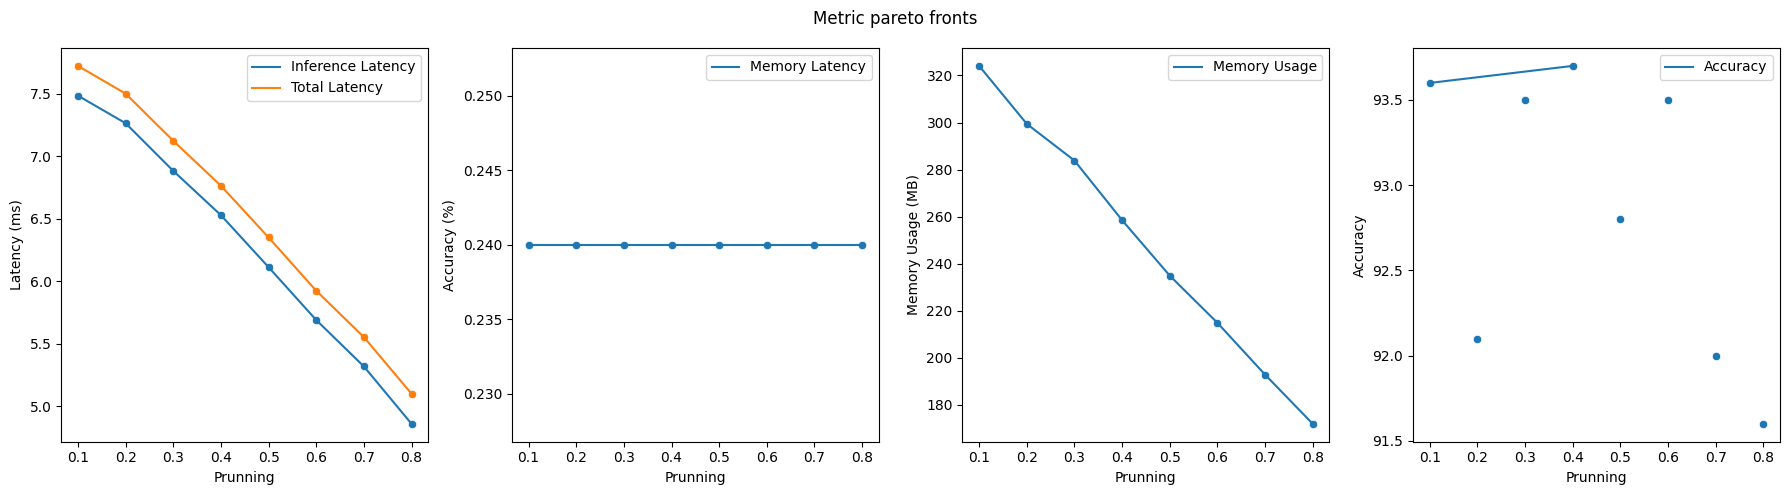

In [11]:
fig, axes = plt.subplots(1,4, figsize=(18, 5))
sns.lineplot(x=pareto_inference[0], y=pareto_inference[1],errorbar=None, label="Inference Latency", ax=axes[0])
sns.lineplot(x=pareto_total[0], y=pareto_total[1],errorbar=None, label="Total Latency", ax=axes[0])
sns.scatterplot(prunning_data, x="Prunning", y="Inference Latency", ax=axes[0])
sns.scatterplot(prunning_data, x="Prunning", y="Total Latency", ax=axes[0])
axes[0].set_xlabel("Prunning")
axes[0].set_ylabel("Latency (ms)")
axes[0].legend()

sns.lineplot(x=pareto_memory[0], y=pareto_memory[1],errorbar=None, label="Memory Latency", ax=axes[1])
sns.scatterplot(prunning_data, x="Prunning", y="Mem Latency", ax=axes[1])
axes[1].set_xlabel("Prunning")
axes[1].set_ylabel("Accuracy (%)")
axes[1].legend()

sns.lineplot(x=pareto_memory_use[0], y=pareto_memory_use[1],errorbar=None, label="Memory Usage", ax=axes[2])
sns.scatterplot(prunning_data, x="Prunning", y="Max Mem use", ax=axes[2])
axes[2].set_xlabel("Prunning")
axes[2].set_ylabel("Memory Usage (MB)")
axes[2].legend()

sns.lineplot(x=pareto_acc[0], y=pareto_acc[1],errorbar=None, label="Accuracy", ax=axes[3])
sns.scatterplot(prunning_data, x="Prunning", y="Accuracy", ax=axes[3])
axes[3].set_xlabel("Prunning")
axes[3].set_ylabel("Accuracy")
axes[3].legend()

fig.suptitle("Metric pareto fronts")
plt.tight_layout()
plt.show()